In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import talib as ta
import numpy as np 
from talib import abstract
import pandas_datareader.data as web
from pandas_datareader import data,wb
import yfinance as yf
import mplfinance as fplt
import datetime as dt
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import plotly.graph_objects as go
import plotly.express as px
import talib as ta

Index update

In [4]:
index = '^GSPC'
sp500 = yf.download(tickers=index,period='y',interval='15m')
df2 = pd.DataFrame(sp500)
sp500 = df2.to_csv('sp500.csv')
sp500 = pd.read_csv('sp500.csv')

[*********************100%***********************]  1 of 1 completed


In [6]:
sp = pd.DataFrame()

sp=yf.download(index,period='y',interval='15m')['Adj Close']

[*********************100%***********************]  1 of 1 completed


Separate; with user input for ticker below.

Stock(s) Data

In [2]:
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
#  yf.download(tickers=stock,period='y',interval='5m')
df = yf.download(stock,start='2023-04-05',end='2023-05-02',interval='5m')
df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

Ticker Symbol:  jpm


[*********************100%***********************]  1 of 1 completed


In [189]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05 09:30:00-04:00,126.800003,127.150002,126.459999,126.989998,126.989998,452519
1,2023-04-05 09:35:00-04:00,127.019997,127.320000,126.879997,127.055000,127.055000,162762
2,2023-04-05 09:40:00-04:00,127.050003,127.379997,126.900002,127.110001,127.110001,184924
3,2023-04-05 09:45:00-04:00,127.120003,127.690002,127.040001,127.540001,127.540001,136462
4,2023-04-05 09:50:00-04:00,127.540001,128.149994,127.480003,128.009995,128.009995,215854


In [191]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1356,2023-05-01 12:00:00-04:00,141.910004,142.380005,141.889999,142.380005,142.380005,154377
1357,2023-05-01 12:05:00-04:00,142.380005,142.539993,142.339996,142.509903,142.509903,158613
1358,2023-05-01 12:10:00-04:00,142.514999,142.539993,142.350006,142.470001,142.470001,110833
1359,2023-05-01 12:15:00-04:00,142.460007,142.720001,142.449997,142.539993,142.539993,131953
1360,2023-05-01 12:20:00-04:00,142.544998,142.690002,142.544998,142.679993,142.679993,40002


In [92]:
# df.rest_index() vs df.index()
data = df.index()

TypeError: 'RangeIndex' object is not callable

In [30]:
# renaming Datetime 
data.rename(columns={'Datetime':'time'})

,time,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01 09:30:00,142.020004,142.839905,141.300003,141.848907,141.848907,3476710
1,2023-05-01 09:45:00,141.850006,142.279999,141.479996,141.729996,141.729996,1058696
2,2023-05-01 10:00:00,141.720001,142.039993,141.100006,141.880005,141.880005,1340501
3,2023-05-01 10:15:00,141.869995,142.469894,141.693695,142.240005,142.240005,1040637
4,2023-05-01 10:30:00,142.250000,143.130005,142.179993,143.119995,143.119995,1200841
5,2023-05-01 10:45:00,143.110001,143.360001,142.389694,142.414993,142.414993,863346
6,2023-05-01 11:00:00,142.399994,142.565002,142.339996,142.449997,142.449997,64739


Adding in moving average; googled the best EMA for 15 min chart since that is what I am using.

In [122]:
def print_data_chart():
    data['20EMA']=ta.EMA(data['Close'],20)
    data['5EMA']=ta.EMA(data['Close'],5)
    chart_data = go.Candestick(x=data['time'],open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'])
    fig = go.Figure(data=[chart_data])
    ema_trace = go.scatter(x=data['time'],y=data['20EMA'],mode='lines',name='20EMA')
    fig.add_trace(ema_trace)
    fig.show()

In [37]:
print_data_chart()

AttributeError: module 'plotly.graph_objects' has no attribute 'Candestick'

# Dash Work

In [2]:
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
#  yf.download(tickers=stock,period='y',interval='5m')
df = yf.download(stock,start='2023-04-05',end='2023-05-02',interval='5m')
df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

Ticker Symbol:  jpm


[*********************100%***********************]  1 of 1 completed


In [3]:
data = pd.read_csv('portfolio.csv',index_col=0,parse_dates=True)
data.index.name='Datetime'

In [4]:
data['20EMA']=ta.EMA(data['Close'],20)
data['5EMA']=ta.EMA(data['Close'],5)
ema_lines = data[['5EMA','20EMA']]

In [5]:
# RSI
# RSI
data['RSI'] = ta.RSI(data['Close'],14)
RSI_col = data['RSI']
RSI = fplt.make_addplot(RSI_col)

In [131]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,20EMA,5EMA,RSI
Datetime,,,,,,,,,
2023-04-03 09:30:00,129.910004,130.839996,129.848999,130.134995,130.134995,893122,NaN,NaN,NaN
2023-04-03 09:45:00,130.149994,131.440002,130.149994,130.985001,130.985001,608840,NaN,NaN,NaN
2023-04-03 10:00:00,131.000000,131.099899,130.723999,130.839996,130.839996,309270,NaN,NaN,NaN
2023-04-03 10:15:00,130.820007,131.000000,130.710007,130.949997,130.949997,333433,NaN,NaN,NaN
2023-04-03 10:30:00,130.970001,131.080002,130.380005,130.389999,130.389999,352355,NaN,130.659998,NaN


In [173]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,20EMA,5EMA,RSI
Datetime,,,,,,,,,
2023-04-28 14:45:00,137.839996,138.080002,137.785400,138.059998,138.059998,197527,137.846539,137.998031,59.606488
2023-04-28 15:00:00,138.070007,138.169998,138.020004,138.120895,138.120895,208979,137.872668,138.038986,61.016321
2023-04-28 15:15:00,138.120804,138.259995,138.054993,138.100006,138.100006,243785,137.894319,138.059326,60.239636
2023-04-28 15:30:00,138.100006,138.160004,137.961105,138.024994,138.024994,372975,137.906764,138.047882,57.413421
2023-04-28 15:45:00,138.020004,138.320007,137.889999,138.259995,138.259995,934716,137.940405,138.118586,63.233130


C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

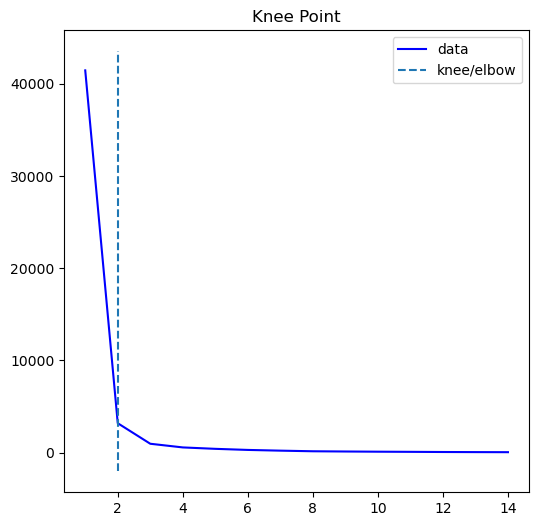

In [7]:
# to find the right K for clusers
from sklearn.cluster import KMeans
import numpy as np
from kneed import DataGenerator, KneeLocator
    
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(stock_prices.reshape(-1,1))
    sum_of_squared_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_squared_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()
# plt.plot(sum_of_squared_distances)

In [46]:
stock_prices = np.array(data['Adj Close'])
#print('Data prices: \n', stock_prices)

# cluster analysis
K = 6
kmeans = KMeans(n_clusters=6).fit(stock_prices.reshape(-1,1))

# predict which cluster each price is in
clusters = kmeans.predict(stock_prices.reshape(-1, 1))
#print("Clusters:\n", clusters)

# Create list to hold values, initialized with infinite values
# min_max_values = []
# init for each cluster group
for i in range(6):
    # Add values for which no price could be greater or less
    min_max_values.append([np.inf, -np.inf])
# Print initial values
print(min_max_values)
# Get min/max for each cluster
for i in range(len(stock_prices)):
    # Get cluster assigned to price
    cluster = clusters[i]
    # Compare for min value
    if stock_prices[i] < min_max_values[cluster][0]:
        min_max_values[cluster][0] = stock_prices[i]
    # Compare for max value
    if stock_prices[i] > min_max_values[cluster][1]:
        min_max_values[cluster][1] = stock_prices[i]
# Print resulting values
print(min_max_values[cluster][0])

C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[[128.16000366210938, 143.2563018798828], [128.16000366210938, 138.91000366210938], [136.88999938964844, 143.2563018798828], [134.125, 137.0399932861328], [126.33999633789062, 140.4499969482422], [126.33999633789062, 140.4499969482422], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf], [inf, -inf]]
128.16000366210938


In [30]:
techs = [ fplt.make_addplot(ema_lines, linestyle='dashdot'),
          fplt.make_addplot(RSI_col,panel=1,color='g',linestyle='dotted'),
          fplt.make_addplot(hlines=min_max_values,color='r')
    
]

TypeError: make_addplot() missing 1 required positional argument: 'data'

C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


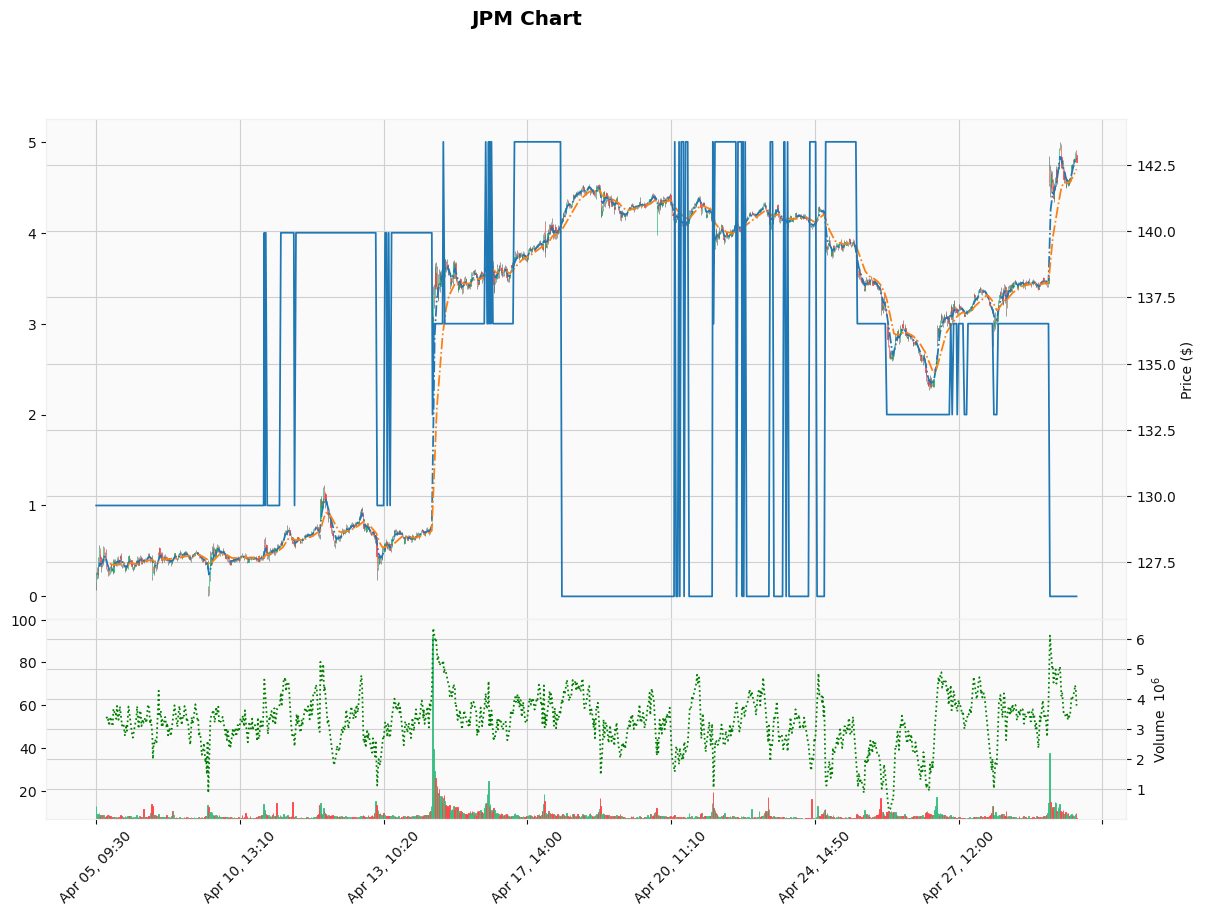

TypeError: cannot unpack non-iterable NoneType object

In [35]:
fig, axlist = fplt.plot(
    data,
    type='candle',
    title=f'{stock} Chart',
    ylabel='Price ($)',
    volume=True,
    style='yahoo',
    addplot=techs,
    figsize=(15,10),
    returnfig=True
)

last = data.iloc[-1,:]
text = (f" {last.name.date().strftime('%Y/%m/%d'):}\n"+
        f"O: {last['Open']:.2f}\n"+
        f"H: {last['High']:.2f}\n"+
        f"L: {last['Low']:.2f}\n"+
        f"C: {last['Close']:.2f}\n"+
        f"V: {last['Volume']:.0f}\n"
       )


axlist[0].annotate(text, xy=(len(df),last['Close']), textcoords='axes fraction', xytext=(1.05,0.76),
                   arrowprops=dict(facecolor='white',width=1),bbox=dict(boxstyle="round",fc="white"))